# Eddy Kinetic Energy

This Jupyter notebook reproduces Figure 1 of the manuscript "Global changes in oceanic mesoscale currents over the satellite altimetry record". Eddy Kinetic Energy is defined as,

\begin{equation}
    \mathrm{EKE}(x,y) = \frac{1}{2}\rho_0\left(u'^2 + v'^2\right)
\end{equation}

Maps of EKE in Figure 1 of this study correspond to the the time-mean EKE:
\begin{equation}
    \overline{EKE}(x,y) = \overline{\frac{1}{2}\rho_0\left(u'^2 + v'^2\right)}
\end{equation}

Then linear trends are computed with a modified Mann-Kendall test (See Methods of manusript).


In [1]:
# Import libraries
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs

import pylab as plt
import numpy as np
# Inline plotting
%matplotlib inline

In [2]:
from plot_utils import truncate_colormap, ccrs_land, add_patches, vectorize

In [3]:
dataset_EKE = xr.open_dataset('../datasets/EKE_timeseries.nc')

In [4]:
rho=1025

### Load EKE timeseries dataset:

In [5]:
EKE = dataset_EKE.EKE

In [6]:
print(dataset_EKE)

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 9928)
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2020-03-07
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Data variables:
    EKE      (time, lat, lon) float64 ...
Attributes:
    title:         Eddy Kinetic Energy
    Description:   Eddy Kinetic Energy computed from AVISO+ altimetry products.
    Publication:   Dataset created for Martínez-Moreno, J. et. al. 2020: \n '...
    Author:        Josué Martínez-Moreno
    Contact:       josue.martinezmoreno@anu.edu.au
    Created date:  20/01/2021 19:43:34


Compute eddy kinetic energy density:

In [7]:
EKE_density = EKE*rho

Slice data between 60°S - 60°N. Note that satellite observations resolve mesoscale eddies between 60°S - 60°N, the effective resolution outside these latitudes is larger than the Rossby radius of deformation.

In [8]:
EKE_domain = EKE_density.sel(lat=slice(-60,60))

Compute time-mean:

In [9]:
mean_EKE = EKE_domain.mean('time')

In [10]:
print(mean_EKE)

<xarray.DataArray 'EKE' (lat: 120, lon: 360)>
array([[0.31153691, 0.28886137, 0.19771366, ..., 0.68070014, 0.64054056,
        0.41831776],
       [0.76847517, 0.4672041 , 0.33838088, ..., 3.26514164, 2.35748724,
        1.49459842],
       [1.01653231, 0.92538218, 1.12764545, ..., 5.42864003, 3.14268802,
        2.0671549 ],
       ...,
       [1.32344949, 1.95456613, 1.78162671, ..., 2.65080843, 1.51221806,
        1.14492844],
       [1.47564859, 1.95606196, 2.5863737 , ..., 2.1779201 , 1.52096168,
        1.42410538],
       [1.59359229, 1.97569259, 2.18671724, ..., 1.27116127, 1.39884663,
        1.7672212 ]])
Coordinates:
  * lat      (lat) float32 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5


### Import trends

In [11]:
SSH_trends = xr.open_dataset('../datasets/SSH_trends.nc')

In [12]:
EKE_trends = xr.open_dataset('../datasets/EKE_trends.nc')

Trends units are $J m^{-3} day^{-1}$, thus, here we convert to $J m^{-3} decade^{-1}$ by multipling by 3650 days.

In [13]:
SSH_trends_per_decade = ( SSH_trends.trend * 10*365 ) 
EKE_trends_per_decade = ( EKE_trends.trend * 10*365 ) 

Slice data between 60°S - 60°N.

In [14]:
SSH_trends = SSH_trends_per_decade.sel(y=slice(-60,60)) 
EKE_trends = EKE_trends_per_decade.sel(y=slice(-60,60)) 

In [15]:
SSH_trends

<xarray.DataArray 'trend' (y: 120, x: 360)>
array([[0.03168946, 0.03138896, 0.03140686, ..., 0.03249941, 0.03257772,
        0.03212987],
       [0.0342333 , 0.03417025, 0.0321192 , ..., 0.03272745, 0.03313373,
        0.03256134],
       [0.03385112, 0.03402355, 0.0324814 , ..., 0.03538581, 0.03238973,
        0.03232404],
       ...,
       [0.03239187, 0.03245537, 0.03273162, ..., 0.03252293, 0.03205607,
        0.03191532],
       [0.03001143, 0.03137378, 0.03145368, ..., 0.03383376, 0.03158304,
        0.03017123],
       [0.02869239, 0.0290094 , 0.02998106, ..., 0.03086808, 0.03117517,
        0.02907432]])
Coordinates:
  * x        (x) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * y        (y) float32 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5

In [16]:
EKE_trends

<xarray.DataArray 'trend' (y: 120, x: 360)>
array([[-1.1149713 , -1.53416653,  0.09166718, ...,  0.37783637,
        -3.08142165, -0.61952774],
       [ 0.2996844 ,  0.21137831,  0.1537179 , ...,  1.22302636,
         1.05485707,  0.62610941],
       [ 0.2526685 ,  0.22458577,  0.10885333, ...,  0.83192264,
         0.8170983 ,  0.51852736],
       ...,
       [ 0.00727586,  0.01700544, -0.04473273, ...,  0.27387962,
         0.01676706,  0.01584413],
       [-0.03828347,  0.065028  ,  0.02299369, ...,  0.2110845 ,
         0.03269822,  0.04709699],
       [-0.0293445 ,  0.08715716, -0.06647769, ...,  0.03816568,
         0.044588  ,  0.10532378]])
Coordinates:
  * x        (x) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * y        (y) float32 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5

### Plot figure 1 of manuscript

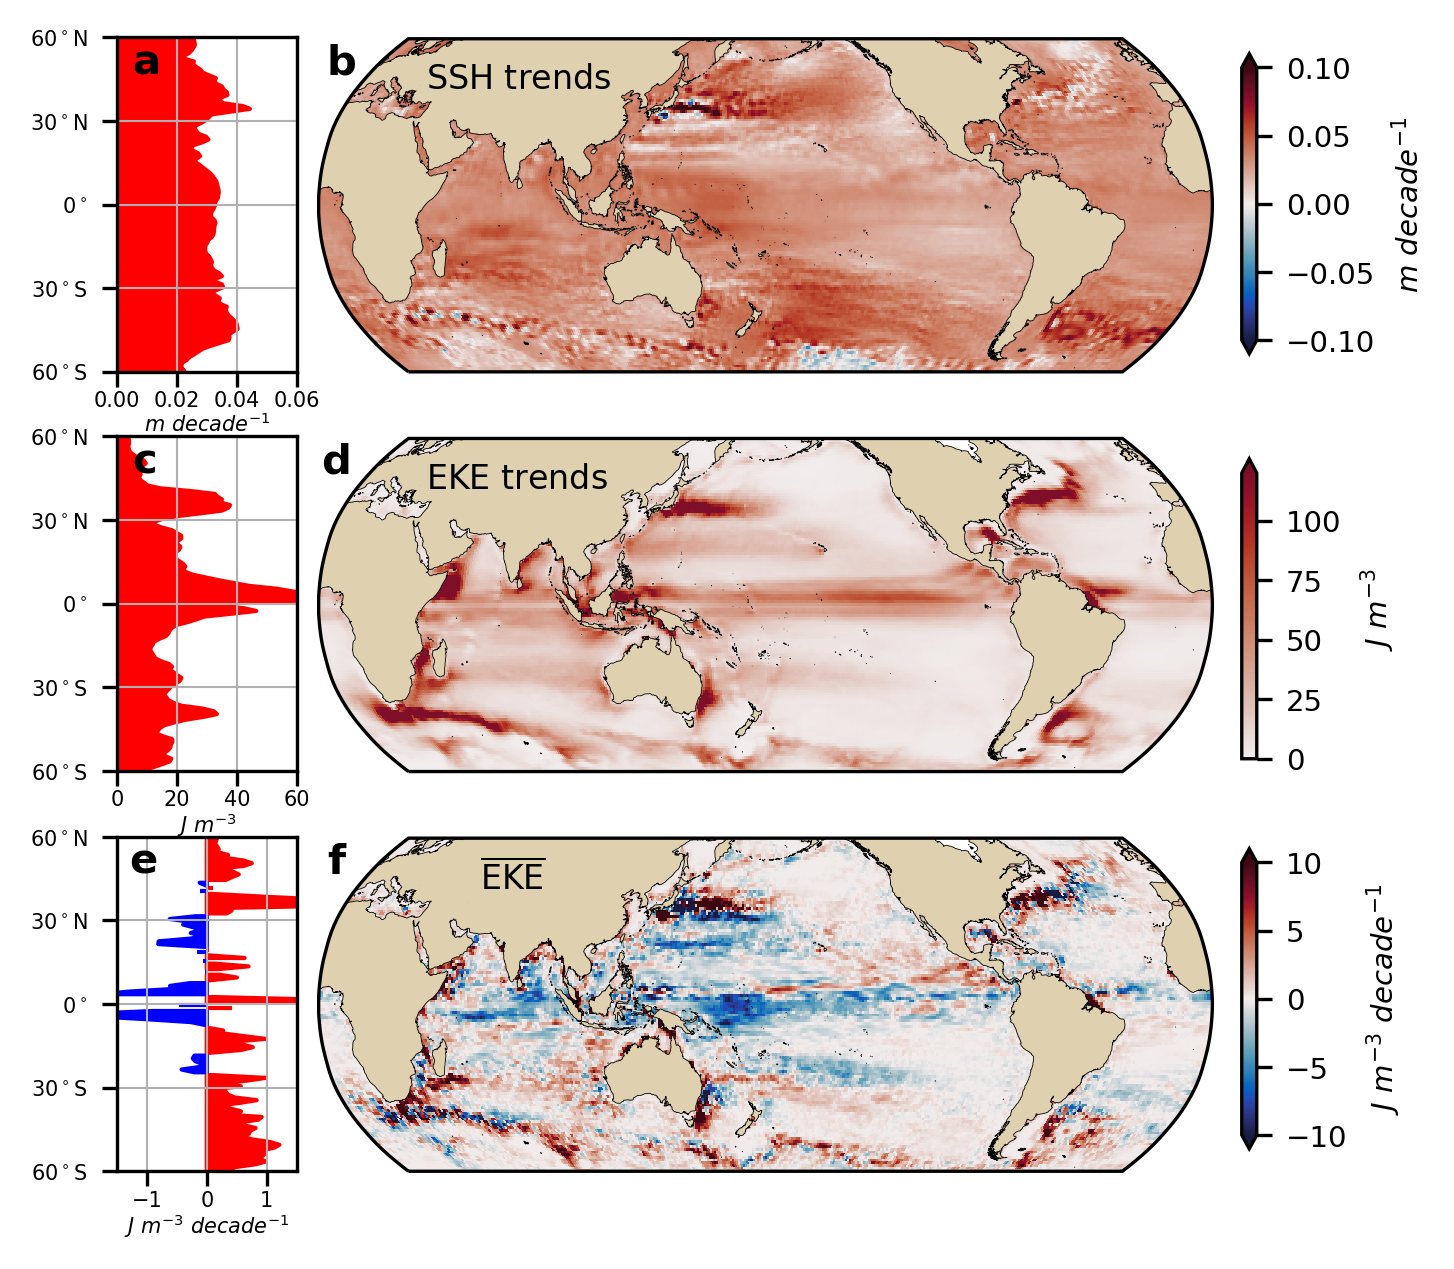

In [17]:
plt.rcParams['xtick.major.pad']='1'

fig = plt.figure(figsize=(5, 5),dpi=300)

ax1 = fig.add_subplot(3, 1, 1, projection = ccrs.Robinson(central_longitude=180))

clm1 = SSH_trends.plot(ax=ax1, transform = ccrs.PlateCarree(), add_colorbar=False,
              cmap = cm.cm.balance, vmin=-0.1, vmax=0.1, rasterized=True)
ax1.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax1.add_feature(ccrs_land)
add_patches(ax1)

ax_w1 = plt.axes([0.08, 0.658, 0.12, 0.223])

zonal_sum_tke=(SSH_trends.T).mean('x')
zonal_sum_tke=zonal_sum_tke

pos=np.ma.masked_where(zonal_sum_tke<0, zonal_sum_tke)
ax_w1.fill_betweenx(zonal_sum_tke.y, pos*0, pos, color='r')

neg=np.ma.masked_where(zonal_sum_tke>0, zonal_sum_tke)

ax_w1.fill_betweenx(zonal_sum_tke.y, neg, neg*0, color='b')

ax_w1.set_ylim(-60,60)
ax_w1.set_xlim(0,0.06)
ax_w1.set_xlabel("$m\ decade^{-1}$",fontsize=5)
ax_w1.xaxis.set_label_coords(0.5, -0.12)
ax_w1.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_w1.tick_params(axis='both', which='major', labelsize=5)
ax_w1.set_yticks(range(-60,61,30))
ax_w1.set_yticklabels(['60$^\circ$S','30$^\circ$S','0$^\circ$','30$^\circ$N','60$^\circ$N'])
ax_w1.grid(linewidth=0.5)
ax_w1.text(0.005,47,'a',fontweight='bold')
ax_w1.text(0.07,47,'b',fontweight='bold')

###############################################################
###############################################################
###############################################################

ax2 = fig.add_subplot(3, 1, 2, projection = ccrs.Robinson(central_longitude=180))

clm2 = mean_EKE.plot(ax=ax2, transform = ccrs.PlateCarree(), add_colorbar=False,
              cmap = truncate_colormap(cm.cm.amp, 0, 0.8), vmin = 0, vmax = 120, rasterized=True)
ax2.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax2.add_feature(ccrs_land)
add_patches(ax2)

ax_w2 = plt.axes([0.08, 0.392, 0.12, 0.223])

zonal_sum_tke=(mean_EKE.T).mean('lon')
zonal_sum_tke=zonal_sum_tke

pos=np.ma.masked_where(zonal_sum_tke<0, zonal_sum_tke)
ax_w2.fill_betweenx(zonal_sum_tke.lat, pos*0, pos, color='r')

neg=np.ma.masked_where(zonal_sum_tke>0, zonal_sum_tke)

ax_w2.fill_betweenx(zonal_sum_tke.lat, neg, neg*0, color='b')

ax_w2.set_ylim(-60,60)
ax_w2.set_xlim(0,60)
ax_w2.set_xlabel("$J\ m^{-3}$",fontsize=5)
ax_w2.xaxis.set_label_coords(0.5, -0.12)
ax_w2.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_w2.tick_params(axis='both', which='major', labelsize=5)
ax_w2.set_yticks(range(-60,61,30))
ax_w2.set_yticklabels(['60$^\circ$S','30$^\circ$S','0$^\circ$','30$^\circ$N','60$^\circ$N'])
ax_w2.grid(linewidth=0.5)
ax_w2.text(5,47,'c',fontweight='bold')
ax_w2.text(68,47,'d',fontweight='bold')

###############################################################
###############################################################
###############################################################

ax3 = fig.add_subplot(3, 1, 3, projection = ccrs.Robinson(central_longitude=180))

clm3 = EKE_trends.plot(transform=ccrs.PlateCarree(), add_colorbar=False,
              cmap=cm.cm.balance, vmin=-10, vmax=10,ax=ax3, rasterized=True)
ax3.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax3.add_feature(ccrs_land)
add_patches(ax3)

ax_w3 = plt.axes([0.08, 0.125, 0.12, 0.223])

increase_tke_gw=(EKE_trends.mean('x'))

pos=np.ma.masked_where(increase_tke_gw<0, increase_tke_gw)
ax_w3.fill_betweenx(increase_tke_gw.y, pos*0 , pos, color='r')

neg=np.ma.masked_where(increase_tke_gw>0, increase_tke_gw)

ax_w3.fill_betweenx(increase_tke_gw.y, neg, neg*0, color='b')

ax_w3.set_ylim(-60,60)
ax_w3.set_xlim(-1.5,1.5)
ax_w3.set_xlabel("$J\ m^{-3}\ decade^{-1}$",fontsize=5)
ax_w3.xaxis.set_label_coords(0.5, -0.12)
ax_w3.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_w3.tick_params(axis='both', which='major', labelsize=5)
ax_w3.set_yticks(range(-60,61,30))
ax_w3.set_yticklabels(['60$^\circ$S','30$^\circ$S','0$^\circ$','30$^\circ$N','60$^\circ$N'])
ax_w3.grid(linewidth=0.5)
ax_w3.text(-1.3,47,'e',fontweight='bold')
ax_w3.text(2,47,'f',fontweight='bold')

#### Colorbars ####

cbar_ax = fig.add_axes([0.83, 0.67, 0.01, 0.2])
cbar=fig.colorbar(clm1, cax=cbar_ax,orientation='vertical',extend='both')
cbar.set_label('$m\ decade^{-1} $', rotation=90, fontsize=7)
cbar.ax.tick_params(labelsize=7) 

cbar_ax = fig.add_axes([0.83, 0.40, 0.01, 0.2])
cbar=fig.colorbar(clm2, cax=cbar_ax,orientation='vertical',extend='max')
cbar.set_label('$J\ m^{-3} $', rotation=90, fontsize=7)
cbar.ax.tick_params(labelsize=7) 

cbar_ax = fig.add_axes([0.83, 0.14, 0.01, 0.2])
cbar=fig.colorbar(clm3, cax=cbar_ax,orientation='vertical',extend='both')
cbar.set_label('$J\ m^{-3}\ decade^{-1} $', rotation=90, fontsize=7)
cbar.ax.tick_params(labelsize=7)

##### Titles #####
ax1.text(0.12,0.85,r'$\mathrm{SSH}$ trends',fontsize=8,transform=ax1.transAxes)
ax3.text(0.18,0.85,r'$\overline{\mathrm{EKE}}$',fontsize=8,transform=ax3.transAxes)
ax2.text(0.12,0.85,r'$\mathrm{EKE}$ trends',fontsize=8,transform=ax2.transAxes)

plt.savefig('../LaTeX/figures/global_trend_WBC_GW_nsignif.pdf',dpi=300,bbox_inches='tight')

**Figure 1 Sea Surface Height trend, mean surface Eddy Kinetic Energy and surface Eddy Kinetic Energy trend between 1993-2019.** (c) zonally averaged mean EKE; (d) map of mean EKE; (e) zonally averaged EKE trend; (f) map of EKE trend (55.4% of global area is significant above 95% confidence level). In panel (d), solid contours show positive EKE trends and dashed contours show negative EKE trends (contours of ±5 J m−3 decade−1).

*Note: Figure 1 a & b corresponds to the SSH trends from AVISO+ (See Methods).*